In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

En primer lugar, comenzamos leyendo el archivo.


In [3]:
filename = "/content/BTC-USD.csv"
df = pd.read_csv(filename) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Para revisar hasta que fecha tenemos la información, revisamos también los ultimos valores del dataset y vemos que la información con la cual haremos el proyecto llega hasta el 5 de Mayo de 2022.


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2783,2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2787,2022-05-05,39727.386719,39788.441406,39444.644531,39568.812500,39568.812500,34693083136


Luego, analizaremos las características descriptivas para conocer más de la base con la cual trabajaremos.

In [4]:
df.shape

(2788, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Close      2788 non-null   float64
 5   Adj Close  2788 non-null   float64
 6   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.6+ KB


De lo anterior notamos que no contamos con datos nulos, por lo que no es necesario trabajar en la limpieza de éstos.

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.duplicated().sum()

0

Además, tampoco existen datos duplicados.

A continuación se realizaran algunas visualizaciones de la data original, para comprender como se relacionan las variables.

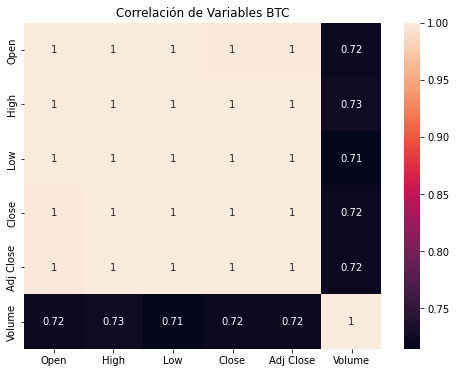

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlación de Variables BTC')
plt.show()

Visualización del precio historico del Bitcoin a la fecha (5/5/2022).

Text(0.5, 1.0, 'Precio de Cierre vs Fecha')

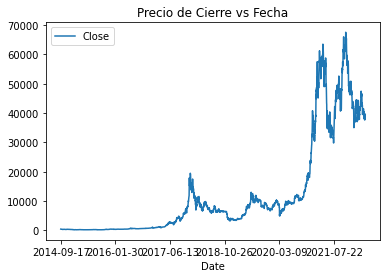

In [10]:
df.plot.line(y="Close", x="Date")
plt.title('Precio de Cierre vs Fecha')